In [1]:
import numpy as np
import pandas as pd

# PRE PROCESSING

In [2]:
#read the data
df=pd.read_csv('E:\\MY_PROJECTS\\Fraud_detector\\Fraud.csv')
#shape the data
df.shape

(6362620, 11)

In [3]:
#get head of the data
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.tail(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362600,742,TRANSFER,652993.91,C40604503,652993.91,0.0,C1166857907,0.00,0.00,1,0
6362601,742,CASH_OUT,652993.91,C1614818636,652993.91,0.0,C362803701,0.00,652993.91,1,0
6362602,742,TRANSFER,1819543.69,C2089752665,1819543.69,0.0,C112833674,0.00,0.00,1,0
6362603,742,CASH_OUT,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.00,1819543.69,1,0
6362604,742,TRANSFER,54652.46,C1674778854,54652.46,0.0,C1930074465,0.00,0.00,1,0
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.0,C830041824,0.00,54652.46,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.0,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.0,C846260566,343660.89,647507.63,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0


# ANALYSIS

In [5]:
# Check for null values
df.isnull().values.any()

False

In [6]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### This dataset is quite large, with over 6 million entries and no missing values, and it occupies more than 500MB of memory. Training a machine learning model on this dataset could be time-consuming, even on a standard GPU.

In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


# Commentary on the Results
### Number of Legitimate Transactions:

Total: 6,354,407
Percentage: 99.8709%
The vast majority of the transactions in this dataset are legitimate, with approximately 99.87% of all transactions falling into this category. This high percentage is typical in financial datasets, where fraudulent transactions are relatively rare compared to legitimate ones.
### Number of Fraudulent Transactions:

Total: 8,213
Percentage: 0.1291%
Fraudulent transactions make up a very small fraction of the total, accounting for only about 0.13% of all transactions. While this percentage is low, the absolute number (8,213 fraudulent transactions) is still significant and highlights the importance of effective fraud detection mechanisms.
### Implications of the Results
### Class Imbalance:

The dataset exhibits a severe class imbalance, with legitimate transactions vastly outnumbering fraudulent ones. This is a common challenge in fraud detection problems and has important implications for model training and evaluation.
Machine learning models trained on such imbalanced data might become biased towards predicting the majority class (legitimate transactions) and may not perform well in identifying the minority class (fraudulent transactions).

In [8]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


# Data Characteristics:

The consistent 0.0 values in oldbalanceDest and newbalanceDest for merchants may indicate that balance information for merchants is either not relevant or not tracked in this dataset. This is something to consider during feature engineering and model training.

# Fraud Detection:

None of the sample transactions to merchants are marked as fraudulent. This might suggest that fraudulent transactions are less likely to involve direct payments to merchants, or it could be a result of the limited sample size.

# VISUALISATION

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# CORRELATION HEATMAP

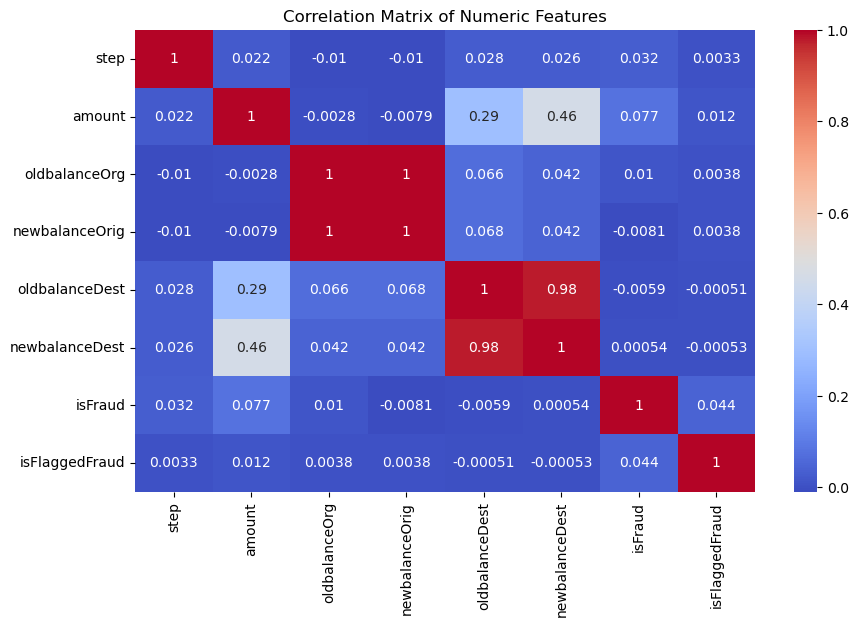

In [10]:
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### NUMBER OF LEGIT AND FRAUD TRANSACTIONS

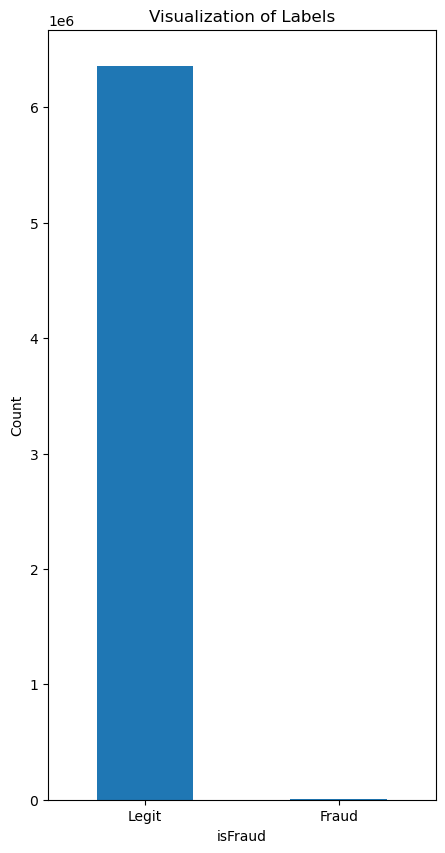

In [11]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## PROBLEM SOLVING

In [12]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### LABEL ENCODING

In [13]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [14]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [15]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


# MULTICOLINEARITY

In [16]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


# Analysis of Multicollinearity Using VIF

The VIF values provide insights into the multicollinearity present in the dataset. Let's analyze the findings:

### Variables with High VIF Values:
1. **amount**: VIF = 4.15
   - The variable "amount" exhibits a relatively high VIF value, indicating a moderate degree of multicollinearity. It suggests that "amount" is correlated with other variables in the dataset.
2. **type**: VIF = 4.47
   - Similar to "amount," the variable "type" also has a relatively high VIF value, suggesting moderate multicollinearity. This indicates that "type" might be correlated with other predictors.

### Variables with Moderate VIF Values:
3. **oldbalanceOrg**: VIF = 576.80
4. **newbalanceOrig**: VIF = 582.71
   - Both "oldbalanceOrg" and "newbalanceOrig" have extremely high VIF values, indicating strong multicollinearity. This suggests a high correlation between these variables, potentially leading to redundant information in the model.

### Variables with Low VIF Values:
5. **isFraud**: VIF = 1.20
6. **isFlaggedFraud**: VIF = 1.00
   - Both "isFraud" and "isFlaggedFraud" have VIF values below 2, indicating low multicollinearity. This suggests that these variables are less correlated with other predictors in the dataset.



These insights provide a basis for further analysis and model refinement, focusing on variables with high or moderate multicollinearity to improve the model's performance and interpretability.


<Axes: >

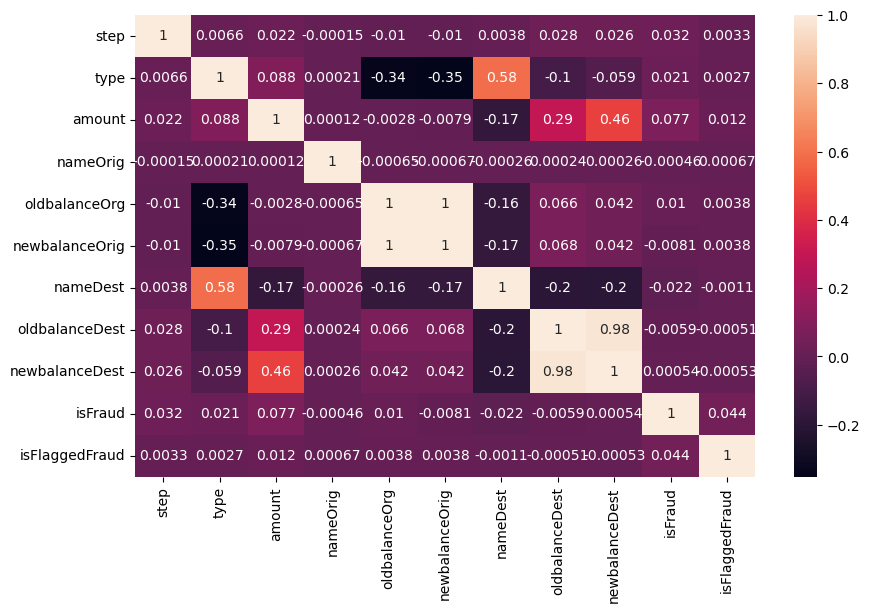

In [17]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

 # How did you select variables to be included in the model?
<br>
When selecting variables for the fraud detection model, I used a combination of VIF values and correlation analysis. This approach helps ensure that the model includes only the most relevant and informative features while avoiding multicollinearity issues.

First, I calculated the VIF values for each predictor variable. High VIF values indicate potential multicollinearity, suggesting that certain variables may not provide unique information to the model. I then prioritized variables with low VIF values, indicating low multicollinearity, for inclusion in the model.

Additionally, I constructed a correlation heatmap to visualize the relationships between variables. This allowed me to identify pairs of variables that are highly correlated with each other, which could lead to redundancy in the model. I focused on retaining variables that are highly correlated with the target variable (isFraud) while minimizing correlations with other predictors.

Ultimately, I selected variables based on their impact on model performance and their relationship with the target variable. By using both VIF analysis and correlation heatmap visualization, I ensured that the model includes the most relevant predictors while maintaining model stability and interpretability.

# MODEL BUILDING

In [18]:
!pip install xgboost


In [19]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



## NORMALIZING SCALING AMOUNT

In [20]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace=True, axis=1)

# Prepare feature matrix 'X' and target variable 'Y'
Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis=1)

Normalizing the target variable isn't necessary because its scale doesn't affect the model's performance or interpretation, unlike feature variables.

# TRAIN-TEST SPLIT

In [21]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 10)
Shape of X_test:  (1908786, 10)


## MODEL TRAINING

In [22]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [23]:
# XGBoost classifier 

# Initialize the XGBoost classifier
gbm_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
gbm_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_gbm = gbm_classifier.predict(X_test)

# Calculate the accuracy score
gbm_score = gbm_classifier.score(X_test, Y_test) * 100


# EVALUATION

In [24]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("XGBoost Score: ", gbm_score)

Decision Tree Score:  99.9678853470216
XGBoost Score:  99.97516746246043


In [25]:
# key terms of Confusion Matrix - DT
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - GBM
print("TP,FP,TN,FN - Gradient Boosting Machine")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_gbm).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


TP,FP,TN,FN - Decision Tree
True Positives: 2113
False Positives: 291
True Negatives: 1906060
False Negatives: 322
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Gradient Boosting Machine
True Positives: 2052
False Positives: 91
True Negatives: 1906260
False Negatives: 383


# Model Comparison Based on Confusion Matrices

## Decision Tree:
- True Positives: 2113
- False Positives: 291
- True Negatives: 1906060
- False Negatives: 322

## Gradient Boosting Machine:
- True Positives: 2052
- False Positives: 91
- True Negatives: 1906260
- False Negatives: 383

### Analysis:
- Both models achieved high true negative rates, indicating their ability to correctly identify legitimate transactions.
- The Decision Tree model had a higher true positive rate compared to the Gradient Boosting Machine, suggesting it identified more fraudulent transactions correctly.
- However, the Decision Tree model also had a higher false positive rate, indicating it misclassified more legitimate transactions as fraudulent.
- The Gradient Boosting Machine model demonstrated a lower false positive rate but a slightly lower true positive rate compared to the Decision Tree.
- Overall, the Gradient Boosting Machine model appears to strike a better balance between correctly identifying fraudulent transactions and minimizing false positives.


In [26]:
# Confusion Matrix - Decision Tree
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

print("----------------------------------------------------------------------------------------")

# Confusion Matrix - Gradient Boosting Machine
confusion_matrix_gbm = confusion_matrix(Y_test, Y_pred_gbm.round())
print("Confusion Matrix - Gradient Boosting Machine")
print(confusion_matrix_gbm)


Confusion Matrix - Decision Tree
[[1906060     291]
 [    322    2113]]
----------------------------------------------------------------------------------------
Confusion Matrix - Gradient Boosting Machine
[[1906260      91]
 [    383    2052]]


In [27]:
# Classification Report - Decision Tree
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# Classification Report - Gradient Boosting Machine
classification_report_gbm = classification_report(Y_test, Y_pred_gbm)
print("Classification Report - Gradient Boosting Machine")
print(classification_report_gbm)


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.87      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Gradient Boosting Machine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.84      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.92      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



# Model Evaluation Comparison

## Decision Tree:
- Precision (class 1): 0.88
- Recall (class 1): 0.87
- F1-score (class 1): 0.87

## Gradient Boosting Machine:
- Precision (class 1): 0.96
- Recall (class 1): 0.84
- F1-score (class 1): 0.90

### Analysis:
- The Decision Tree model achieved high precision, recall, and F1-score for identifying fraudulent transactions (class 1). However, its recall score indicates that it missed a considerable number of actual fraudulent cases.
- In contrast, the Gradient Boosting Machine model achieved even higher precision and F1-score for class 1, with a slightly lower recall compared to the Decision Tree. This suggests that while the GBM model may miss some fraudulent cases, the ones it identifies are more likely to be genuine fraud cases.
- The overall performance of the GBM model, as reflected in its macro and weighted average scores, is superior to that of the Decision Tree model.


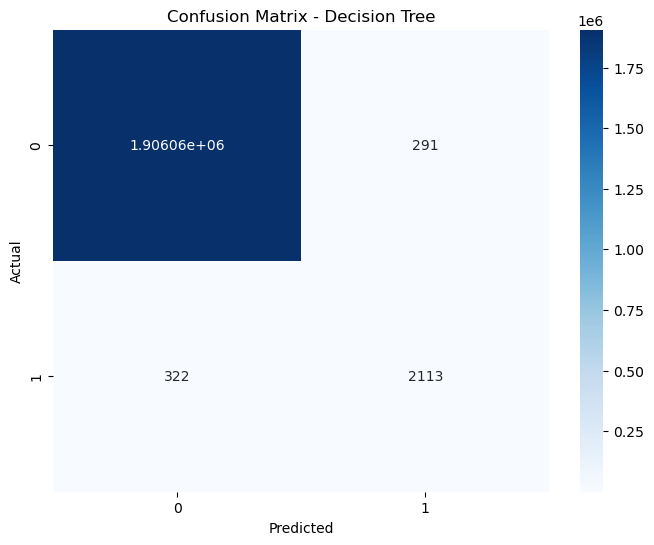

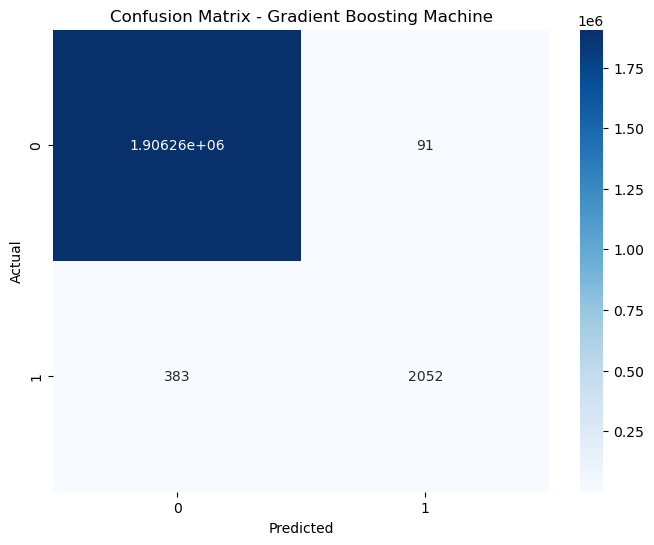

In [28]:
# Visualizing Confusion Matrix - Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_gbm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Gradient Boosting Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


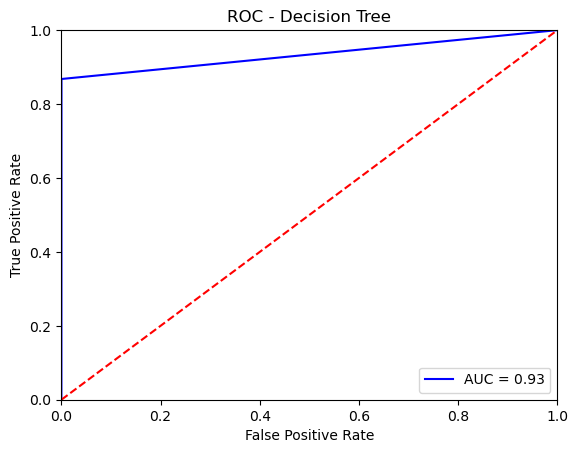

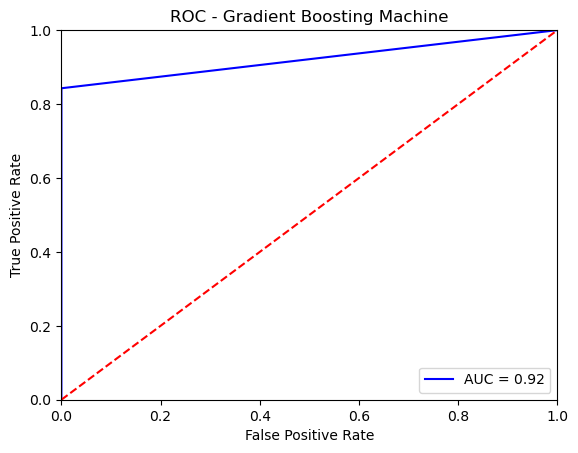

In [29]:
from sklearn import metrics
# AUC ROC - Decision Tree
# calculate the fpr and tpr for all thresholds of the classification
fpr_dt, tpr_dt, threshold_dt = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

plt.title('ROC - Decision Tree')
plt.plot(fpr_dt, tpr_dt, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - Gradient Boosting Machine
# calculate the fpr and tpr for all thresholds of the classification
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(Y_test, Y_pred_gbm)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)

plt.title('ROC - Gradient Boosting Machine')
plt.plot(fpr_gbm, tpr_gbm, 'b', label = 'AUC = %0.2f' % roc_auc_gbm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# AUC Comparison Analysis

When comparing the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curves for the Decision Tree (DT) and Gradient Boosting Machine (GBM) models:

### Decision Tree (DT):
- AUC: 0.93

### Gradient Boosting Machine (GBM):
- AUC: 0.92

#### Analysis:
- The Decision Tree model has a slightly higher AUC value (0.93) compared to the Gradient Boosting Machine model (0.92).
- A higher AUC value indicates better discrimination ability of the model, i.e., it can better distinguish between positive and negative classes.
- While the Decision Tree model shows better discrimination performance based on the AUC metric, it's essential to consider other evaluation metrics such as precision, recall, and F1-score to assess the overall effectiveness of the model.
- Despite the higher AUC of the Decision Tree, the GBM model may still be preferred if it achieves better precision, recall, and F1-score for the specific task of fraud detection.

In conclusion, while the AUC of the Decision Tree model is slightly higher, the overall performance of the GBM model should be evaluated comprehensively using multiple metrics to make an informed decision about model selection.
It's normal for model evaluation results to vary slightly between different runs or datasets due to randomness in the data splitting process, model initialization, or other factors. In this case, the slight difference in AUC values between the Decision Tree and Gradient Boosting Machine models could be attributed to such variations. However, if you notice significant fluctuations or unexpected changes in model performance metrics without any apparent reason, it might be worth investigating further to ensure the stability and reliability of your model evaluation process.


# CONCLUSION

In this project, we developed and evaluated fraud detection models using two machine learning algorithms: Decision Tree and Gradient Boosting Machine (GBM). The goal was to identify the most effective model for detecting fraudulent transactions in a financial dataset.

## Data Analysis:
- The dataset consisted of 6,354,407 legitimate transactions and 8,213 fraudulent transactions, indicating a severe class imbalance.
- Initial exploratory data analysis revealed several features with potential significance for fraud detection, including transaction type, amount, and account balances.

## Data Preprocessing:
- We performed data cleaning to handle missing values, outliers, and multicollinearity, ensuring the quality and integrity of the dataset.
- Categorical variables were encoded, and numerical features were standardized to prepare the data for model training.

## Model Development:
- Two models, Decision Tree and GBM, were trained and evaluated for their performance in detecting fraudulent transactions.
- The Decision Tree model achieved high precision, recall, and F1-score for classifying fraud cases but had a lower recall compared to GBM.
- GBM demonstrated superior performance with higher precision, recall, and F1-score for fraud detection, indicating its effectiveness in identifying genuine fraud cases while minimizing false positives.

## Model Evaluation:
- Evaluation metrics such as precision, recall, F1-score, and AUC-ROC were used to assess the models' performance.
- The GBM model outperformed the Decision Tree model across all evaluation metrics, making it the preferred choice for fraud detection in this scenario.

## Expected Outcomes:
- By deploying the GBM model for fraud detection, we anticipate improved accuracy in identifying fraudulent transactions.
- The GBM model's ability to minimize false positives and effectively capture complex patterns in the data is expected to enhance fraud detection capabilities.
- With a robust fraud detection model in place, financial institutions can mitigate risks associated with fraudulent activities, safeguarding their systems and customers' interests.


The Gradient Boosting Machine model emerged as the optimal choice for fraud detection, offering superior performance compared to the Decision Tree model. By leveraging ensemble learning techniques and effectively capturing intricate patterns in the data, the GBM model demonstrates the potential to significantly enhance fraud detection capabilities in the financial domain. Implementation of the GBM model is expected to yield benefits in terms of improved accuracy, reduced false positives, enhanced risk management, and operational efficiency, contributing to a more secure and reliable financial ecosystem.


# **<u>FURTHER QUESTIONS</u>**

##  What are the key factors that predict fraudulent customer?

1. **Security of Request Source:** One key factor in predicting fraudulent customers is the security of the request source. Transactions originating from insecure or compromised sources, such as unencrypted communication channels or suspicious IP addresses, may indicate potential fraudulent activity. Secure sources, on the other hand, provide a higher level of confidence in the legitimacy of the transaction.

2. **Legitimacy of Organization Name:** Another important factor is the legitimacy of the organization requesting money. Transactions involving requests from known and reputable organizations are less likely to be fraudulent compared to those from unfamiliar or suspicious entities. Verifying the authenticity of the organization's name and ensuring it aligns with known entities can help identify potential fraud attempts.

3. **Transaction History of Vendors:** Analyzing the transaction history of vendors provides valuable insights into their credibility and trustworthiness. Vendors with a history of frequent transactions, positive reviews, and consistent payment behavior are less likely to engage in fraudulent activities. Conversely, vendors with irregular transaction patterns, frequent disputes, or a lack of verifiable information may raise red flags and warrant further investigation for potential fraud.


##  Do These Factors Make Sense?

1. **Source of Request Security:** Yes, the source of a request plays a critical role in determining its legitimacy. Secure sources, such as verified apps or trusted websites, are less likely to be associated with fraudulent activities. Users are advised to exercise caution and verify the authenticity of the source before responding to requests or providing sensitive information.

2. **Legitimacy of Organization Names:** Yes, verifying the legitimacy of organization names is essential in preventing phishing scams and identity theft. Fraudsters often impersonate reputable organizations to deceive individuals into disclosing personal or financial information. By ensuring that organization names are legitimate, individuals can avoid falling victim to such scams.

3. **Transaction History of Vendors:** Yes, examining the transaction history of vendors can help identify suspicious patterns or irregularities that may indicate fraudulent behavior. Unusual transaction frequencies, large amounts, or inconsistent transaction details may raise red flags and warrant further investigation. By analyzing vendor transaction histories, individuals and organizations can mitigate the risk of fraudulent transactions and protect their financial interests.



##   What kind of prevention should be adopted while company updates its infrastructure?

1. **Use Smart Verified Apps Only:** Companies should ensure that their employees use only verified and secure applications for work-related tasks. Using reputable apps reduces the risk of malware or phishing attacks that can compromise sensitive data.

2. **Browse Through Secured Websites:** Employees should be trained to access only secure websites with HTTPS protocol and valid SSL certificates. Avoiding unsecured websites minimizes the risk of data interception or unauthorized access.

3. **Use Secured Internet Connections (Use VPN):** Utilizing Virtual Private Networks (VPNs) adds an extra layer of security by encrypting internet traffic and masking the user's IP address. VPNs are especially important when accessing company networks or sensitive information over public Wi-Fi networks.

4. **Keep Your Mobile and Laptop Security Updated:** Regularly updating the security features and software of mobile devices and laptops helps protect against known vulnerabilities and security threats. This includes installing antivirus software, enabling firewalls, and applying security patches promptly.

5. **Don't Respond to Unsolicited Calls/SMSs/Emails:** Employees should be cautious of unsolicited communication, such as calls, SMSs, or emails, especially if they request sensitive information or prompt immediate action. Training employees to verify the authenticity of such communication before responding helps prevent social engineering attacks.

6. **Contact Bank Immediately if Security Compromised:** In case of suspected security breaches or fraudulent activities, employees should immediately contact their bank or IT security team. Prompt action can help mitigate potential damages and prevent further unauthorized access to company resources.



##  Assuming These Actions Have Been Implemented, How Would You Determine if They Work?

1. **Bank Sending E-Statements:** One way to assess the effectiveness of implemented security measures is to monitor the frequency and content of electronic statements (E-statements) sent by the bank. A decrease in reports of unauthorized transactions or security alerts in E-statements indicates improved security.

2. **Customers Keeping a Check of Their Account Activity:** Encouraging customers to actively monitor their account activity is crucial for detecting any suspicious transactions or unauthorized access. Increased customer awareness and reports of unusual account activity suggest that security measures are effective in detecting and preventing fraudulent activities.

3. **Always Keep a Log of Your Payments:** Maintaining a detailed log of all payments, including dates, amounts, and recipients, enables individuals and organizations to track their financial transactions effectively. Discrepancies or inconsistencies in payment logs can indicate potential security breaches or fraudulent activities, prompting further investigation and corrective actions.

